**TASK-5**

---



**Description:**

---


Engineer new features and select relevant
features for model training.


---


---


**Responsibility:**

---


1.Generate meaningful features from existing
data.
2.Use techniques like PCA or feature
importance to select the most important
features.
Optimize feature sets for improved model
performance.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [23]:
#Checking columns names
print(df.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [24]:
#Checking for null values
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

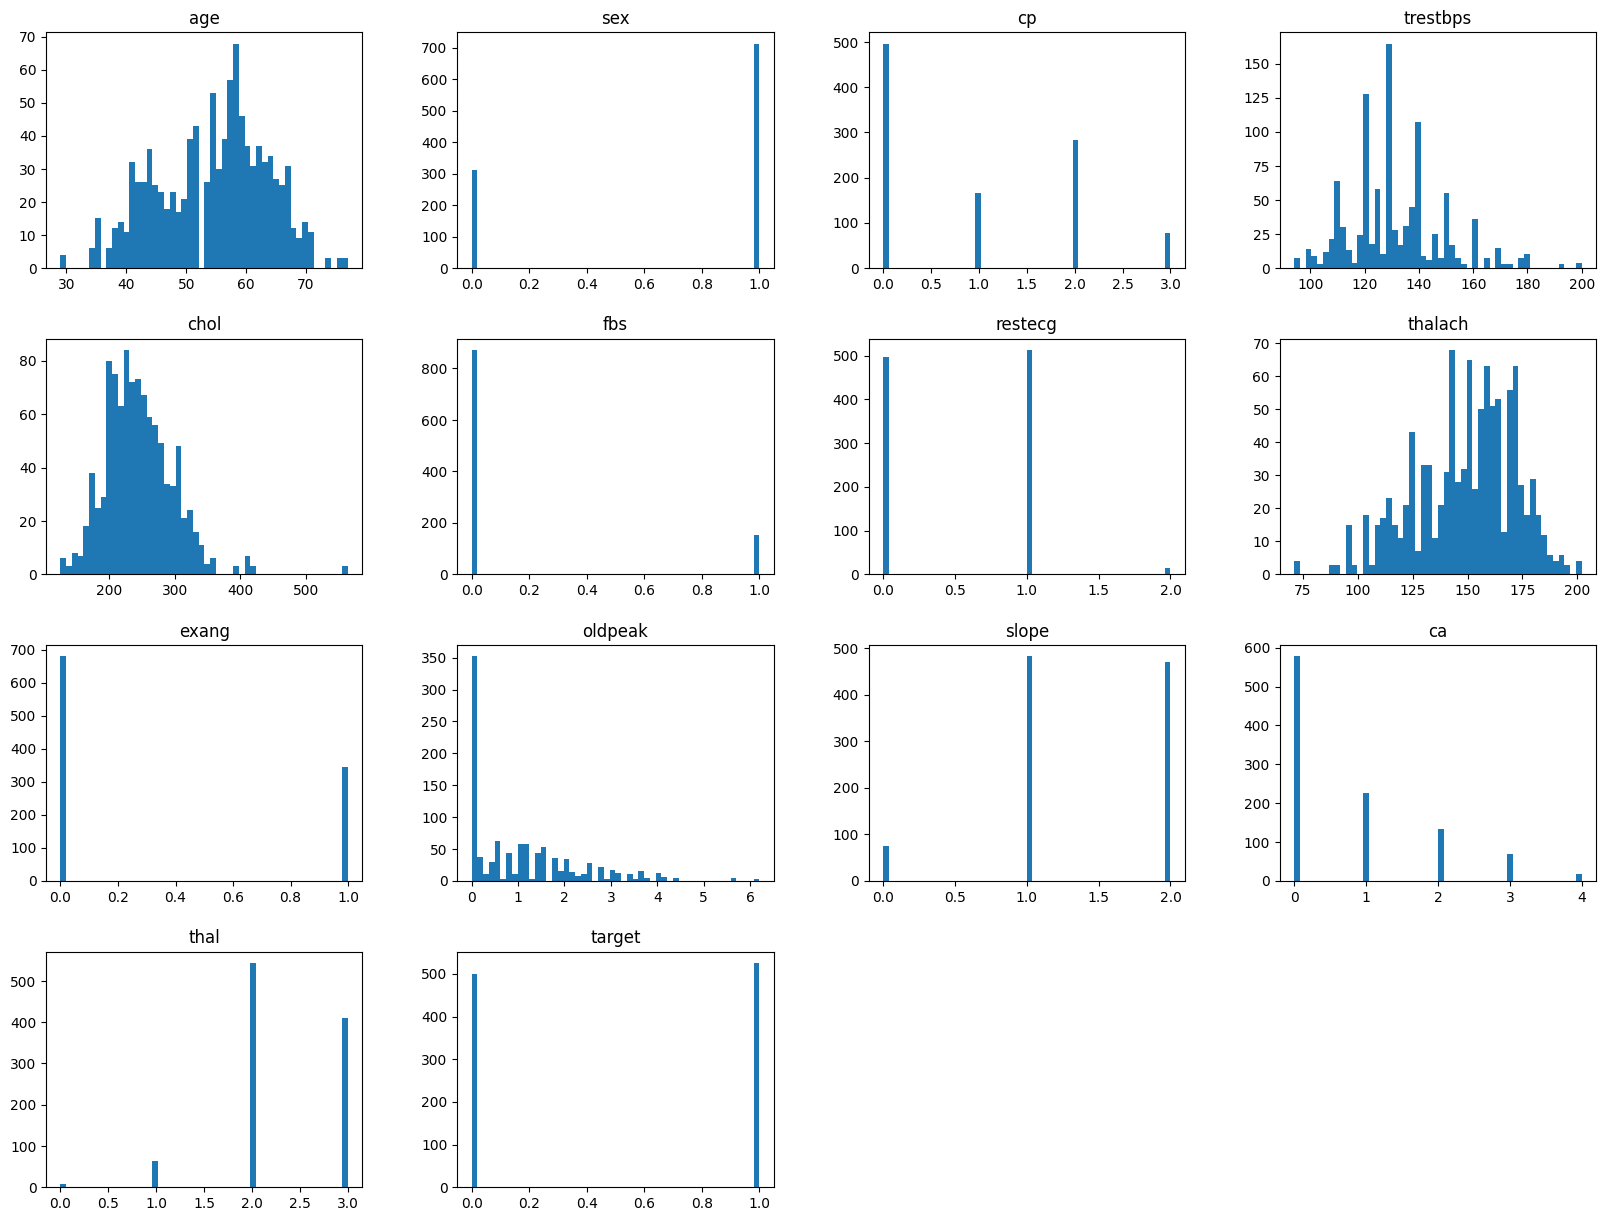

In [11]:
#Ploting histogram
df.hist(bins=50, grid=False, figsize=(20,15))

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


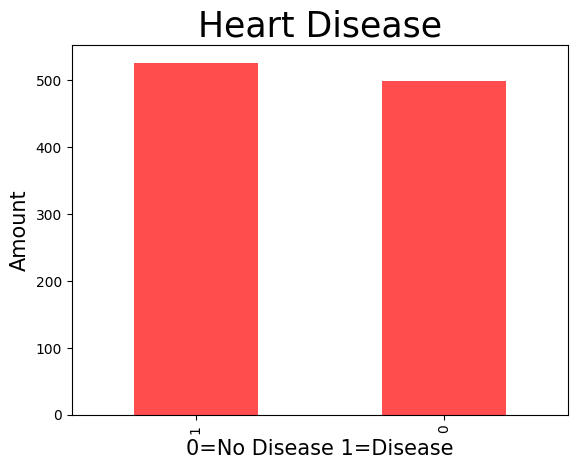

In [13]:
# Ques. 1 How many persons have heart disease and how many people do not have heart disease

df.target.value_counts()\
#plotting results using bar chart
df.target.value_counts().plot(kind='bar',color='red',alpha=0.7)
plt.title("Heart Disease",fontsize=25)
plt.xlabel("0=No Disease 1=Disease",fontsize=15)
plt.ylabel("Amount",fontsize=15)
plt.show()

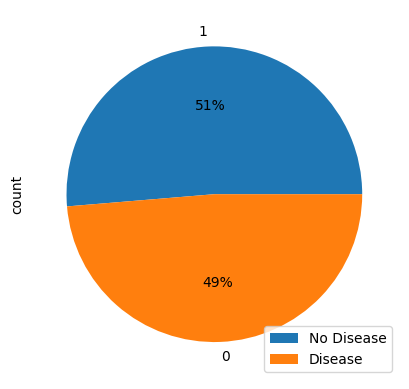

In [14]:
#using pie chart
df.target.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.legend(['No Disease','Disease'])
plt.show()

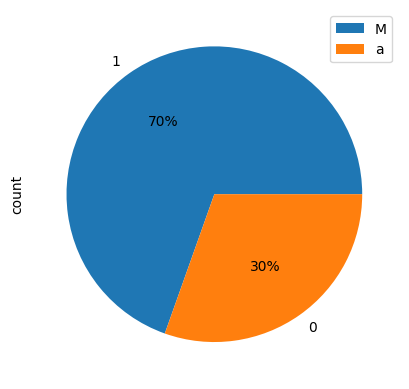

In [15]:
# How many male and female are in dataset
df.sex.value_counts()
#Plotting results
df.sex.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.legend(['Female','Male'])
plt.legend("Male Female Ratio")
plt.show()

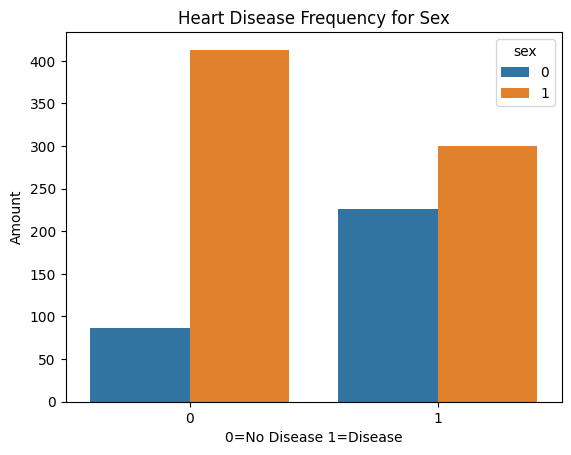

In [16]:
#Ques.2 People of which sex has the most heart disease
pd.crosstab(df.target,df.sex)
sns.countplot(x='target',hue='sex',data=df)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease 1=Disease")
plt.ylabel("Amount")
plt.show()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


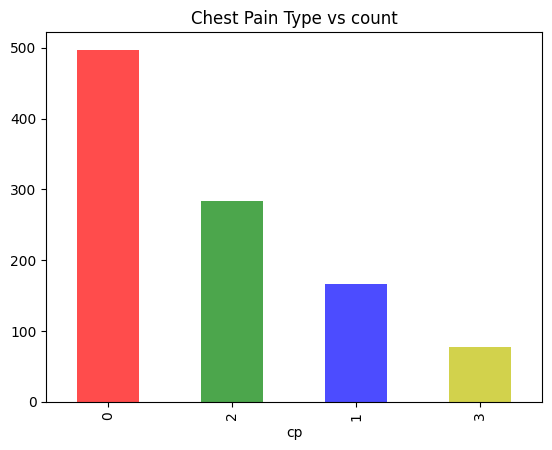

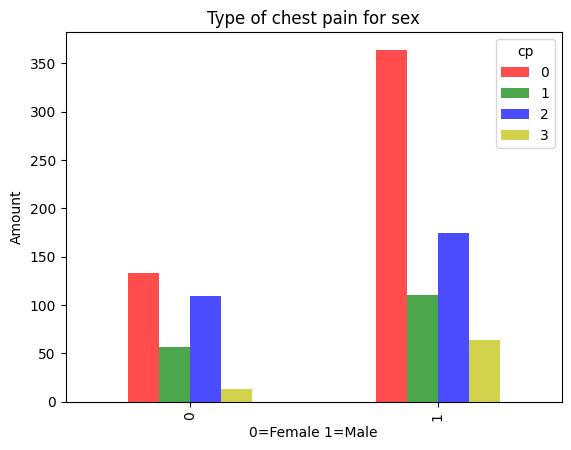

In [18]:
#Ques.3 People of which sex has which type of chest pain most?
cp=df.cp.value_counts()
print(cp)
#plotting results
# df.cp.value_counts().plot(kind='pie',autopct='%1.0f%%')
# plt.legend(['ASY','ATA','NAP','TA'])
# plt.title("Chest Pain")
# plt.show()
df.cp.value_counts().plot(kind='bar',color=['r','g','b','y'],alpha=0.7)
plt.title("Chest Pain Type vs count")
pd.crosstab(df.sex,df.cp)
#plotting crosstab
pd.crosstab(df.sex,df.cp).plot(kind='bar',color=['r','g','b','y'],alpha=0.7)
plt.title("Type of chest pain for sex")
plt.xlabel('0=Female 1=Male')
plt.ylabel('Amount')
plt.show()

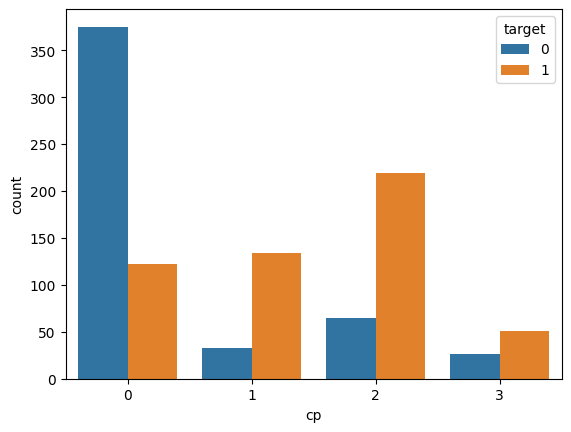

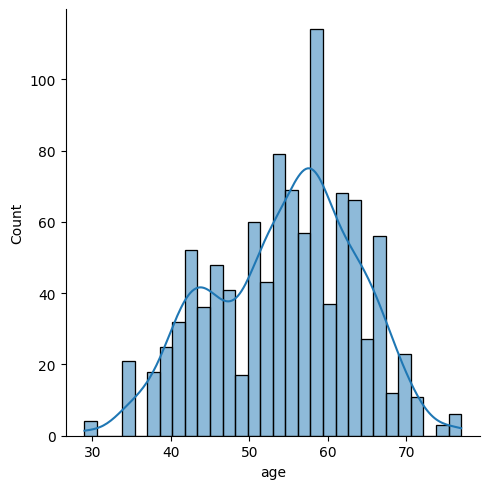

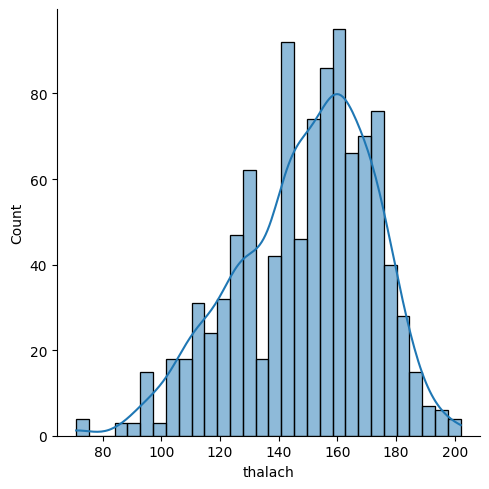

In [19]:
#Ques.4 People with which chest pain are most pron to have heart disease?
pd.crosstab(df.target,df.cp)

sns.countplot(x=df.cp,data=df,hue='target')

#Plotting for age
sns.displot(x='age',data=df,bins=30,kde=True)

#plotting for maximum heart rate
sns.displot(x='thalach',data=df,bins=30,kde=True)

Axes(0.125,0.11;0.775x0.77)


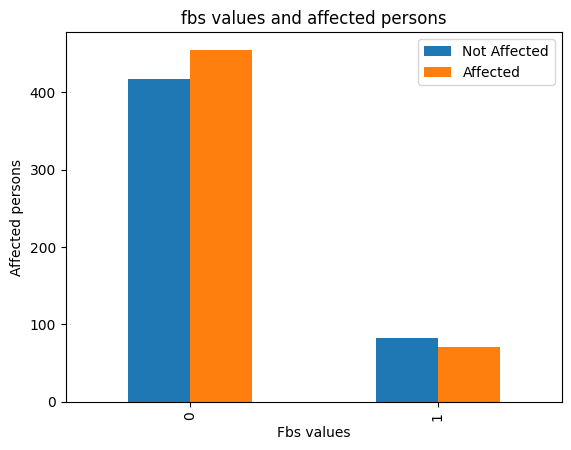

In [20]:
 #Ques. 5 How Many person having fbs value 0 or  1 are pron to have heart disease?
fbs=pd.crosstab(df.fbs,df.target).plot(kind='bar')
print(fbs)
pd.crosstab(df.target,df.fbs).value_counts()
plt.xlabel("Fbs values")
plt.ylabel("Affected persons")
plt.title("fbs values and affected persons")
plt.legend(['Not Affected','Affected'])


target    0    1
exang           
0       225  455
1       274   71


<Axes: xlabel='exang'>

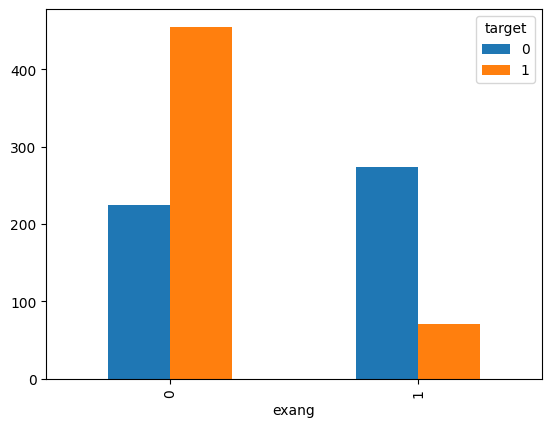

In [21]:
#Ques.6 Number of persons prone to heart disease on the basis of exang
fbs=pd.crosstab(df.exang,df.target)
print(fbs)
pd.crosstab(df.exang,df.target).plot(kind='bar')

target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15


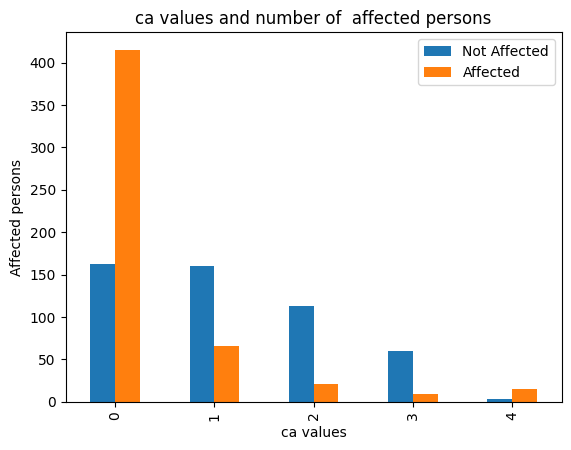

In [22]:
#Ques. 7 ca values and number of affected persons
print(pd.crosstab(df.ca,df.target))
pd.crosstab(df.ca,df.target).plot(kind='bar')
plt.ylabel("Affected persons")
plt.xlabel("ca values")
plt.title("ca values and number of  affected persons")
plt.legend(['Not Affected','Affected'])